### Locally Weighted Regression

In [296]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Data preparation

In [297]:
dfx = pd.read_csv("../dataset/locally-weighted/weightedX.csv")
dfy = pd.read_csv("../dataset/locally-weighted/weightedY.csv")

In [298]:
X = np.array(dfx)
Y = np.array(dfy)

In [299]:
print(X.shape, Y.shape)

(99, 1) (99, 1)


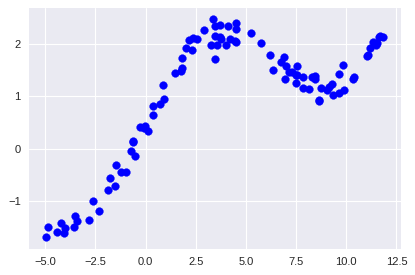

In [300]:
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, Y, c ="blue");


### Normalization of Dataset

In [301]:
u = np.mean(X)
sigma = np.std(X)
X = (X - u)/sigma

In [302]:
#  ploting style
plt.style.use('seaborn')

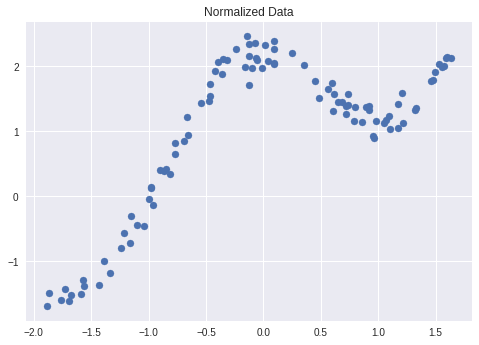

In [303]:
plt.title("Normalized Data")
plt.scatter(X, Y);

#### Data Modelling

In [304]:
X.shape

(99, 1)

In [305]:
X[:3]

array([[-0.35705077],
       [-0.8177695 ],
       [-0.35449839]])

In [306]:
def getW(X,q,tau):
    
    #Create W
    m = X.shape[0]
    W = np.eye(m) 
    
    for i in range(m):
        W[i,i] = np.exp(-np.dot((X[i]-q),(X[i]-q).T)/(2*tau*tau))
    
    return W
    
def getTheta(X,Y,q,tau):
    
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
    W = getW(X,q,tau)
    Y = Y.reshape((-1,1))
    q = np.array([1,q])
    
    theta = np.dot(np.linalg.pinv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),Y))
    return theta,W



In [322]:
theta, W = getTheta(X, Y, 1.0, .01)

In [329]:
X_Test = np.linspace(-5,4,50)

Y_Test = []

for xt in X_Test:
    theta,W = getTheta(X,Y,xt,0.1)
    pred = theta[0][0] + theta[1][0]*xt
    Y_Test.append(pred)
    
Y_Test = np.array(Y_Test)
print(Y_Test.shape)
print(Y_Test.shape)

(50,)
(50,)


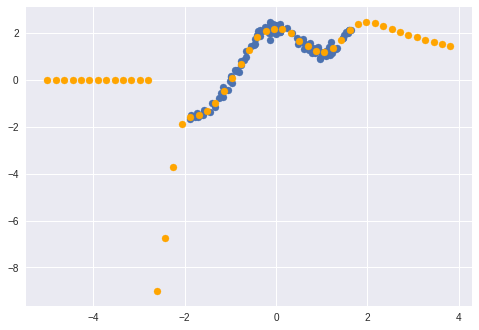

In [330]:
plt.scatter(X,Y)
plt.scatter(X_Test,Y_Test,c='orange')
plt.show()